# Parkinson's Disease Detection

In [48]:
import os
import cv2
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
plt.style.use('dark_background')

In [2]:
! ls

100_spiral_model.h5            spiral_basic_model.ipynb
FINAL_MODEL.ipynb              spiral_final_model.ipynb
Original_data                  spiral_healthy_augumentor.py
SPIRAL_MODEL.ipynb             spiral_parkinson_augumentor.py
Testing_01.ipynb               wave
Wave_Final_Model.ipynb         wave_basic_model.ipynb
models                         wave_healthy_augumentor.py
spiral                         wave_parkinson_augumentor.py


In [4]:
cur_dir = os.getcwd()
health_data = os.path.join(cur_dir, 'spiral/healthy/')
parkinson_data = os.path.join(cur_dir, 'spiral/parkinson/')

a, b, health_list = next(os.walk(health_data))
a, b, parkinson_list = next(os.walk(parkinson_data))

print(len(health_list))
print(len(parkinson_list))

2546
2543


### Splitting dataset

In [14]:
base_dir = os.path.join(cur_dir, 'spiral_data')
# os.mkdir(base_dir) #make base directory

In [21]:
!ls

100_spiral_model.h5            spiral_data
FINAL_MODEL.ipynb              spiral_final_model.ipynb
Original_data                  spiral_healthy_augumentor.py
SPIRAL_MODEL.ipynb             spiral_parkinson_augumentor.py
Testing_01.ipynb               wave
Wave_Final_Model.ipynb         wave_basic_model.ipynb
models                         wave_healthy_augumentor.py
spiral                         wave_parkinson_augumentor.py
spiral_basic_model.ipynb


In [15]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_h_dir = os.path.join(train_dir, 'healthy')
# os.mkdir(train_h_dir)

train_p_dir = os.path.join(train_dir, 'parkinson')
# os.mkdir(train_p_dir)

validation_h_dir = os.path.join(validation_dir, 'healthy')
# os.mkdir(validation_h_dir)

validation_p_dir = os.path.join(validation_dir, 'parkinson')
# os.mkdir(validation_p_dir)

test_h_dir = os.path.join(test_dir, 'healthy')
# os.mkdir(test_h_dir)

test_p_dir = os.path.join(test_dir, 'parkinson')
# os.mkdir(test_p_dir)

In [33]:
img_path = os.path.join(cur_dir,'spiral/healthy')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)

# Healthy training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(train_h_dir, images)
#     shutil.copyfile(src, dst)

# Healthy training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(test_h_dir, images)
#     shutil.copyfile(src, dst)
    
# Healthy training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(validation_h_dir, images)
#     shutil.copyfile(src, dst)
    

In [28]:
a, b, numbers = next(os.walk(train_h_dir))
print(len(numbers))

1000


In [31]:
a, b, numbers = next(os.walk(test_h_dir))
print(len(numbers))

500


In [34]:
a, b, numbers = next(os.walk(validation_h_dir))
print(len(numbers))

500


### Training Data

In [101]:
train = tf.keras.utils.image_dataset_from_directory(train_dir)
data_iterator = train.as_numpy_iterator()


Found 2000 files belonging to 2 classes.


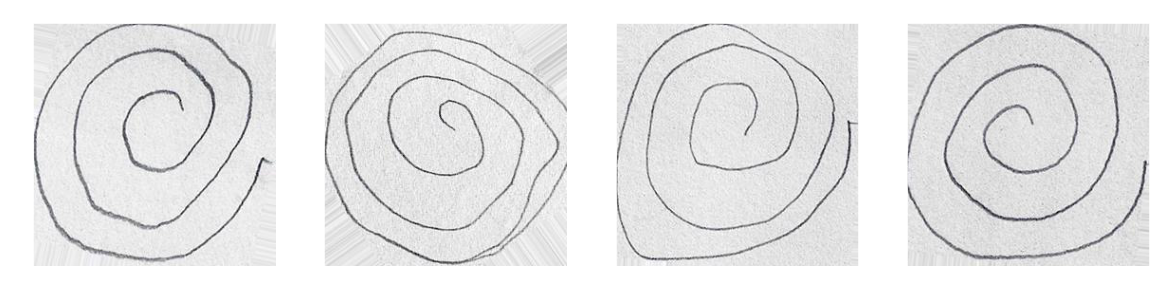

In [102]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [103]:
train = train.map(lambda x,y: (x/255, y))

In [104]:
train.as_numpy_iterator().next()

(array([[[[0.9137255 , 0.9137255 , 0.9137255 ],
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.9098039 , 0.9098039 , 0.9098039 ],
          ...,
          [0.91764706, 0.91764706, 0.91764706],
          [0.9137255 , 0.9137255 , 0.9137255 ],
          [0.9137255 , 0.9137255 , 0.9137255 ]],
 
         [[0.9137255 , 0.9137255 , 0.9137255 ],
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.90588236, 0.90588236, 0.90588236],
          ...,
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.8784314 , 0.8784314 , 0.8784314 ],
          [0.8627451 , 0.8627451 , 0.8627451 ]],
 
         [[0.92156863, 0.92156863, 0.92156863],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.8980392 , 0.8980392 , 0.8980392 ],
          ...,
          [0.87058824, 0.87058824, 0.87058824],
          [0.85490197, 0.85490197, 0.85490197],
          [0.84705883, 0.84705883, 0.84705883]],
 
         ...,
 
         [[0.93333334, 0.93333334, 0.93333334],
          [0.93333

### Testing Data

In [105]:
test = tf.keras.utils.image_dataset_from_directory(test_dir)
data_iterator = test.as_numpy_iterator()

Found 1000 files belonging to 2 classes.


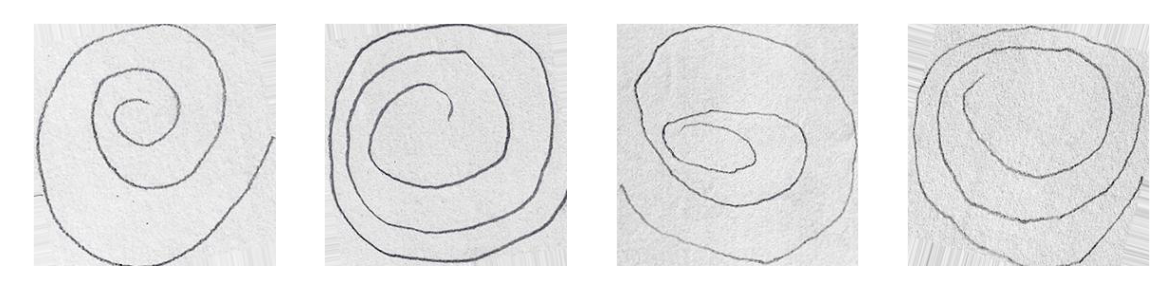

In [106]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [107]:
test = test.map(lambda x,y: (x/255, y))

In [108]:
test.as_numpy_iterator().next()

(array([[[[0.8862745 , 0.8862745 , 0.8862745 ],
          [0.90588236, 0.90588236, 0.90588236],
          [0.92156863, 0.92156863, 0.92156863],
          ...,
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.87058824, 0.87058824, 0.87058824],
          [0.8509804 , 0.8509804 , 0.8509804 ]],
 
         [[0.8862745 , 0.8862745 , 0.8862745 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.91764706, 0.91764706, 0.91764706],
          ...,
          [0.8666667 , 0.8666667 , 0.8666667 ],
          [0.85490197, 0.85490197, 0.85490197],
          [0.84705883, 0.84705883, 0.84705883]],
 
         [[0.89411765, 0.89411765, 0.89411765],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9098039 , 0.9098039 , 0.9098039 ],
          ...,
          [0.84705883, 0.84705883, 0.84705883],
          [0.85882354, 0.85882354, 0.85882354],
          [0.8666667 , 0.8666667 , 0.8666667 ]],
 
         ...,
 
         [[0.9137255 , 0.9137255 , 0.9137255 ],
          [0.91764

### Validation Data

In [109]:
valid = tf.keras.utils.image_dataset_from_directory(validation_dir)
data_iterator = valid.as_numpy_iterator()

Found 1000 files belonging to 2 classes.


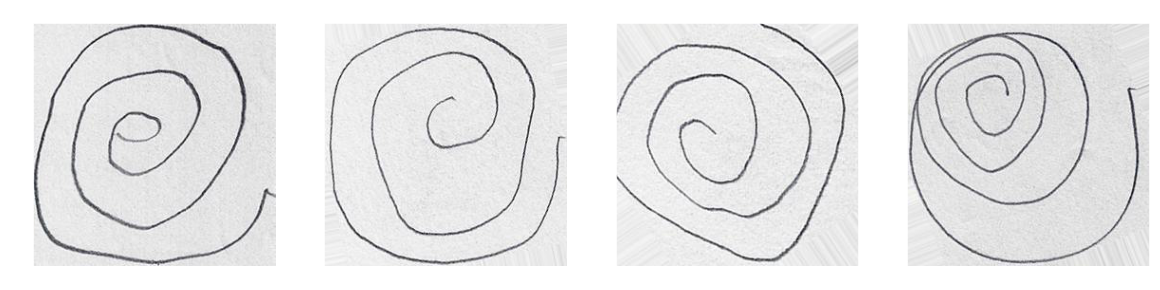

In [110]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [111]:
valid = valid.map(lambda x,y: (x/255, y))

In [112]:
valid.as_numpy_iterator().next()

(array([[[[0.8784314 , 0.8784314 , 0.8784314 ],
          [0.8745098 , 0.8745098 , 0.8745098 ],
          [0.87058824, 0.87058824, 0.87058824],
          ...,
          [0.89411765, 0.89411765, 0.89411765],
          [0.8784314 , 0.8784314 , 0.8784314 ],
          [0.8627451 , 0.8627451 , 0.8627451 ]],
 
         [[0.8666667 , 0.8666667 , 0.8666667 ],
          [0.8666667 , 0.8666667 , 0.8666667 ],
          [0.8666667 , 0.8666667 , 0.8666667 ],
          ...,
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.8784314 , 0.8784314 , 0.8784314 ],
          [0.8627451 , 0.8627451 , 0.8627451 ]],
 
         [[0.8392157 , 0.8392157 , 0.8392157 ],
          [0.8392157 , 0.8392157 , 0.8392157 ],
          [0.84313726, 0.84313726, 0.84313726],
          ...,
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.8784314 , 0.8784314 , 0.8784314 ],
          [0.85882354, 0.85882354, 0.85882354]],
 
         ...,
 
         [[0.8784314 , 0.8784314 , 0.8784314 ],
          [0.87450

---

In [43]:
img_path = os.path.join(cur_dir,'spiral/parkinson/')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)


# Parkinson training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(train_p_dir, images)
#     shutil.copyfile(src, dst)
    

# Parkinson training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(test_p_dir, images)
#     shutil.copyfile(src, dst)



# Parkinson training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(validation_p_dir, images)
#     shutil.copyfile(src, dst)
    

In [40]:
a, b, numbers = next(os.walk(train_p_dir))
print(len(numbers))

1000


In [42]:
a, b, numbers = next(os.walk(test_p_dir))
print(len(numbers))

500


In [44]:
a, b, numbers = next(os.walk(validation_p_dir))
print(len(numbers))

500


In [66]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256, 256), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Designing the MODEL

In [154]:
model = Sequential()

# Feature Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

#Hidden Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 128)     

In [137]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [tensorboard_callback,reduce_learningrate]

In [138]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [139]:
history = model.fit(train,
                   epochs=2,
                   validation_data=valid,
                   callbacks=reduce_learningrate)


Epoch 1/2
63/63 [==============================] - 240s 4s/step - loss: 0.7496 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/2
63/63 [==============================] - 242s 4s/step - loss: 0.6932 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010


### Model Evaluation

/var/folders/ts/4y5v3zns7x5c84jf9byws_nc0000gn/T/ipykernel_31421/785622656.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
/var/folders/ts/4y5v3zns7x5c84jf9byws_nc0000gn/T/ipykernel_31421/785622656.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')


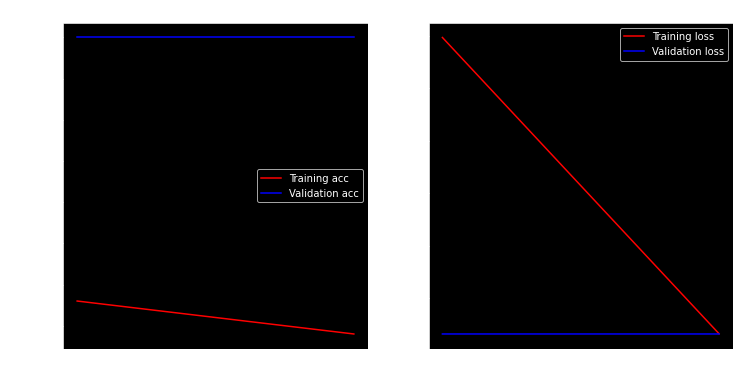

In [140]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
    
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test on Data

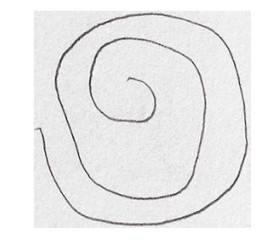

In [141]:
img_path = os.path.join(cur_dir, 'spiral/healthy/healthy_V01HE01_0_1119.jpg')

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

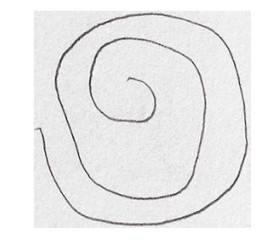

In [142]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [145]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.49980608]]


In [146]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person is Healthy


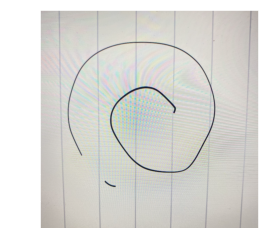

In [147]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/test4.png')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)
plt.show()

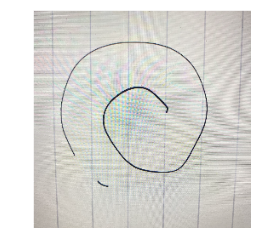

In [148]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [149]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.49980608]]


In [150]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person is Healthy


In [152]:
Predict_Proba_One = model.predict(test)

In [153]:
print(Predict_Proba_One)

[[0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49980608]
 [0.49